In [1]:
import xarray as xr
import cartopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
ds = xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/NARR/monolevel/cape.2007.nc")
hlcy = xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/NARR/monolevel/hlcy.2007.nc")
z500 = xr.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/NARR/pressure/hgt.200705.nc")
u500 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/NARR/pressure/uwnd.200705.nc')
v500 = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/NARR/pressure/vwnd.200705.nc')
hlcy

/programs/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'cape' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/programs/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'hlcy' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/programs/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/programs/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'uwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/programs/anaconda3/envs/pyEAE/li

<xarray.Dataset>
Dimensions:            (time: 2920, y: 277, x: 349)
Coordinates:
  * time               (time) datetime64[ns] 2007-01-01 ... 2007-12-31T21:00:00
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 0.0 3.246e+04 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Data variables:
    Lambert_Conformal  int32 ...
    hlcy               (time, y, x) float32 ...
Attributes: (12/17)
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    ...                              ...
    history:                         created Tue Mar  8 09:42:47 MST 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    References:                      
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds_day = ds.sel(time="2007-05-05T00:00:00")
z500_day = z500.sel(level=500., time="2007-05-05T00:00:00", x=slice(4000000,12000000))
u500_day = u500.sel(level=500., time="2007-05-05T00:00:00", x=slice(4000000,12000000))
v500_day = v500.sel(level=500., time="2007-05-05T00:00:00", x=slice(4000000,12000000))
hlcy_day = hlcy.sel(time="2007-05-05T00:00:00", x=slice(4000000,12000000))

v500_day

<xarray.Dataset>
Dimensions:            (y: 277, x: 225)
Coordinates:
    time               datetime64[ns] 2007-05-05
    level              float32 500.0
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 4.025e+06 4.058e+06 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Data variables:
    Lambert_Conformal  int32 ...
    vwnd               (y, x) float32 ...
Attributes: (12/17)
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    ...                              ...
    history:                         created Tue Mar  8 19:38:54 MST 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    References:                      
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
df = gpd.read_file('/home/jcorner1/1950-2019-torn-aspath/1950-2019-torn-aspath.shp')
df_greensburg = df.query("(date == '2007-05-06' | date == '2007-05-05') & st == 'KS'")
df_greensburg.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'fc', 'geometry'],
      dtype='object')

/programs/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


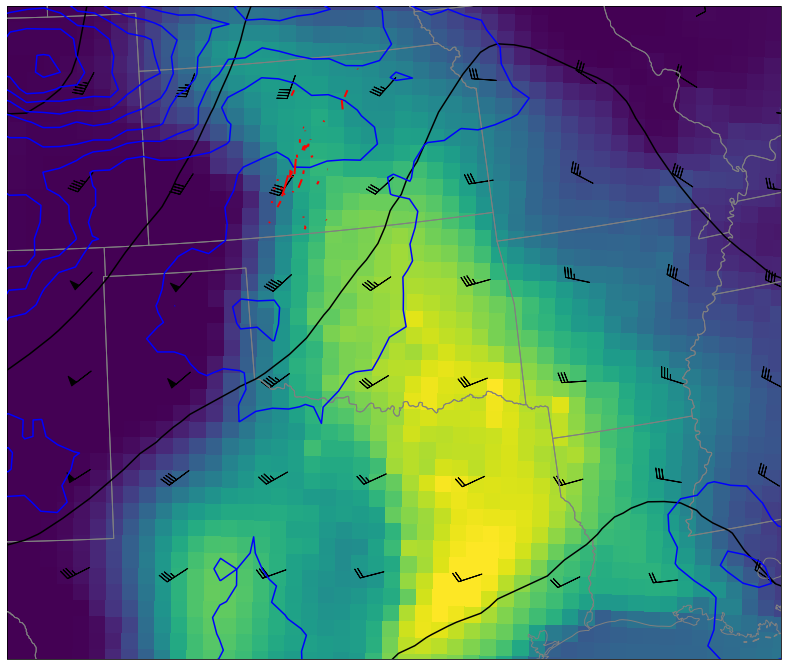

In [5]:
fig = plt.figure()
fig.set_size_inches(16,12)
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal(central_latitude = 50., central_longitude = -107.))
c = ax1.pcolormesh(ds_day.lon, ds_day.lat, ds_day.cape, transform=cartopy.crs.PlateCarree(), vmin=0, vmax=5000)
ax1.add_feature(cartopy.feature.STATES, facecolor='none', edgecolor='grey', zorder = 9)
ax1.add_geometries(df_greensburg['geometry'], crs = cartopy.crs.PlateCarree() , zorder = 11, color = 'red', linewidth = 2)
ax1.contour(z500_day.lon, z500_day.lat, z500_day.hgt, transform = cartopy.crs.PlateCarree(), levels = np.arange(0,7000,60), colors='k', zorder = 10)
ax1.contour(z500_day.lon, z500_day.lat, hlcy_day.hlcy, transform = cartopy.crs.PlateCarree(), levels = np.arange(150,700,50), colors='blue', zorder = 10)
ax1.barbs(z500_day.lon.values[::6,::6], z500_day.lat.values[::6,::6], u500_day.uwnd.values[::6,::6]*1.94, v500_day.vwnd.values[::6,::6]*1.94, transform=cartopy.crs.PlateCarree())
ax1.set_extent([-105,-90,30,40])



#ax1(ds_x, ds_y, ds_cape)